<a href="https://colab.research.google.com/github/lavishabhambri/Machine-Learning/blob/master/Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Of Linear Regression

# **Loading Data**

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
#Creating 1D data
x = iris.data[0:,0:1].reshape(-1,1)    #converting into 2D array
y = iris.target

In [ ]:
print(x.shape)
print(y.shape)

(150, 1)
(150,)


# Creating DataFrame

In [ ]:
import pandas as pd
df = pd.DataFrame(x)
df

,0
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
df.columns = iris.feature_names[0:1]
df

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
df.describe()

,sepal length (cm)
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


# Splitting into Testing And Training Data

In [ ]:
from sklearn import model_selection
x_train, x_test , y_train, y_test = model_selection.train_test_split(x, y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 1)
(38, 1)
(112,)
(38,)


# Get the Classifier

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the scores

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
#to get coefficient matrix in Linear Regression
lr.coef_

array([0.77925154])

In [ ]:
#to get slope in Linear Regression
lr.intercept_

-3.5753197536712484

In [ ]:
lr.score(x_test, y_test)

0.5647269841535203

# Graph Analysis

In [ ]:
m = lr.coef_[0]
c = lr.intercept_

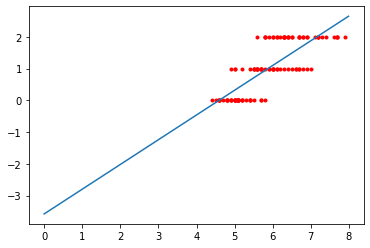

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x_line = np.arange(0,8,0.01)
y_line = m*x_line + c
plt.plot(x_line, y_line)
train1D = x_train.reshape(112)
plt.scatter(train1D, y_train, color = 'red', marker='.')
plt.show()

# Making own Linear Regresion function

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
x = iris.data[0:, 0:1]
y = iris.target

In [ ]:
print(x.shape)
print(y.shape)

(150, 1)
(150,)


In [ ]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 1)
(38, 1)
(112,)
(38,)


In [ ]:
def fit(x_train, y_train):
    num = ((x_train*y_train).mean() - x_train.mean() * y_train.mean())
    den = (x_train**2).mean() - x_train.mean()**2
    m = num/den
    c = y_train.mean() - m * x_train.mean()
    return m, c

def predict(x, m, c):
    return m*x + c

def score(y_truth, y_test):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1 - u/v

def cost(x_train, y_train, m, c):
    return ((y_train - m*x - c)**2).mean()

In [ ]:
m, c = fit(x_train, y_train)

#test data
y_test_predict = predict(x_test, m, c)
print('Test Score : ', score(y_test, y_test_predict))

print('M, C : ',m,c)
print('Cost on Training data : ', cost(x_train, y_train, m, c))

Test Score :  -0.430092230443351
M, C :  -2.357732165762194e-15 0.9910714285714424
Cost on Training data :  0.669563137755102
